# <b style="color:red; font-family:verdana">Raster Data Model</b>

<br>
<b style="font-family:Fantasy">Giuliano Langella</b> &nbsp; &nbsp;
<b style="font-family:Arial">glangella@unina.it</b>

<b>Tobler's Low of Geography (1970): <br><em>$\quad$ "Everything is related to everything else, but near things are more related than distant things".</em></b>

### <b style="color:#929292">Useful links</b>
https://cran.r-project.org/doc/contrib/intro-spatial-rl.pdf <br>
http://www.rspatial.org <br>
http://pakillo.github.io/R-GIS-tutorial/#iovec <br>
http://www.nickeubank.com/wp-content/uploads/2015/10/ <br>
https://www.neonscience.org/resources/learning-hub/tutorials/extract-values-rasters-r <br>
https://rspatial.org/raster/spatial/6-crs.html <br>

In [1]:
library(repr)  # to size plots within Jupyter
options(repr.plot.width = 8)

---

## <b style="color:orange">Coordinate Reference Systems</b>

---

### Read  <b style="color:green">chapter 09 </b>of following link

[Intro to GIS and Spatial Analysis](https://mgimond.github.io/Spatial/chp09-0.html)

---

## <b style="color:orange">Raster data model</b>

---

### Schematic <b style="color:green">representation</b> of a raster

<img src="../../../artwork/Raster_data_matadata.gif" alt="raster schema">

We can distinguish **two blocks** in a raster (also called grid):<br>
 - <b style="color:#0044ff; font-size:16px; font-family:American Typewriter">metadata</b>, such as
   - class, e.g. RasterLayer
   - size, e.g. 3264 x 4800 pixels (nrows x ncols)
   - resolution, e.g. 5 meters (synonims are CELLSIZE, PIXELSIZE)
   - extent / bounding box (xmin, xmax, ymin, ymax)
   - crs (a geographic or projected coordinate system, generally in the proj4 format or EPSG code)
   - no data value, e.g. -9999 (synonims are NODATAVALUE, NODATA)
   - source (location of file on hard disk, such as ../docente_Langella/Raster-Data/dem5m_vt.tif)
 - <b style="color:#0044ff; font-size:16px; font-family:American Typewriter">data</b>, that is a matrix (=grid) of cells (=pixels)
   - the grid of cells has size nrows x ncols
   - each cell in a grid store one numeric value (e.g. integer or double number)
   - (we can have multiple layers as depicted in the multidimensional raster data representaion)

### import <b style="color:green">raster</b> | example: D.E.M.

In [2]:
# The command ?raster search for raster string in the documentation.  If the raster package is not loaded in R, the command below gives a warning that
# nothing was found.
?raster

In [2]:
library(raster)  # load the raster package in R

Loading required package: sp


In [4]:
# The command below open the documentation of the raster function of the raster package in the help:
?raster

In [5]:
getwd()

[1] "/Users/giuliano/work/Didattica/Veterinaria/PrecisionLivestockFarming/lectures/2020"

#### Import (i.e. read) a raster

One of the most common rasters used worldwide is the one storing the elevation of each point of land surface.<br>
This kind of raster is called D.E.M., that is Digital Elevation Model.<br>
The raster has the data matrix in which each pixel stores the value of elevation of that surface on Earth.

In [3]:
dem <- raster("../exercises/docente_Langella/Raster-Data/dem5m_vt.tif")

In [7]:
class(dem)

[1] "RasterLayer"
attr(,"package")
[1] "raster"

In [19]:
hasValues(dem)

[1] TRUE

##### Plot raster

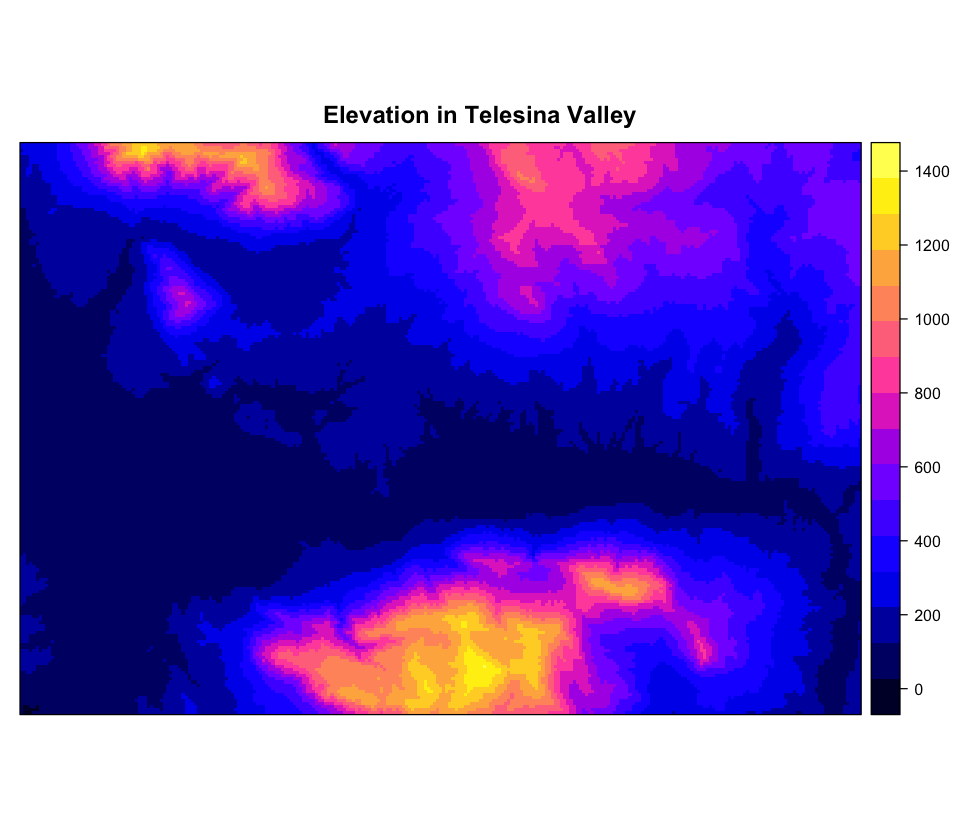

In [20]:
spplot(dem, main = "Elevation in Telesina Valley")

#### <b style="color:blue">Metadata</b>

##### Print the dem <b style="color:blue">metadata</b>

In [8]:
dem

class      : RasterLayer 
dimensions : 3264, 4800, 15667200  (nrow, ncol, ncell)
resolution : 5, 5  (x, y)
extent     : 453000, 477000, 4556000, 4572320  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=33 +datum=WGS84 +units=m +no_defs +ellps=WGS84 +towgs84=0,0,0 
source     : /Users/giuliano/work/Didattica/Veterinaria/PrecisionLivestockFarming/lectures/exercises/docente_Langella/Raster-Data/dem5m_vt.tif 
names      : dem5m_vt 


##### Bounding Box

In [9]:
extent(dem)

class      : Extent 
xmin       : 453000 
xmax       : 477000 
ymin       : 4556000 
ymax       : 4572320 

In [10]:
bbox(dem)

,min,max
s1,453000,477000
s2,4556000,4572320


In [11]:
xmin <- 453000  # metri
ymin <- 4556000  # metri
xmax <- 477000  # metri
ymax <- 4572320  # metri

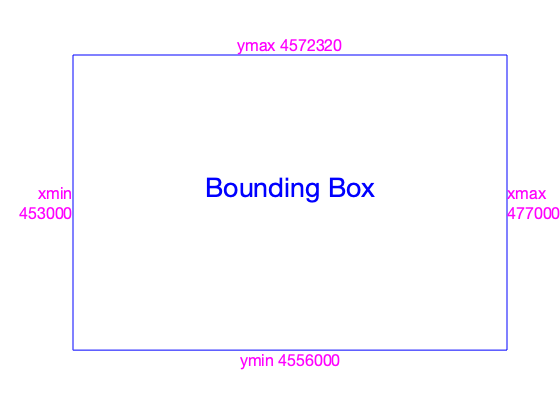

In [12]:
%get xmin ymin xmax ymax --from R
line( [xmin,xmin],[ymin,ymax], 'color','b' ) % left
line( [xmin,xmax],[ymin,ymin], 'color','b' ) % bottom
line( [xmax,xmax],[ymin,ymax], 'color','b' ) % right
line( [xmin,xmax],[ymax,ymax], 'color','b' ) % bottom
text(xmin+(xmax-xmin)/2,ymin+(ymax-ymin)/2,'Bounding Box','color','b',...
     'HorizontalAlignment','center','VerticalAlignment','bottom',...
     'Fontsize',20)
%text(xmin,ymin+(ymax-ymin)/2,'xmin',...
%     'color','m','Fontsize',12,'HorizontalAlignment','left')
text(xmin,ymin+(ymax-ymin)/2,{'xmin'; num2str(xmin)},...
     'color','m','Fontsize',12,'HorizontalAlignment','right')
text(xmax,ymin+(ymax-ymin)/2,{'xmax';num2str(xmax)},...
     'color','m','Fontsize',12,'HorizontalAlignment','left')
text(xmin+(xmax-xmin)/2,ymin,['ymin ',num2str(ymin)],...
     'color','m','Fontsize',12,'VerticalAlignment','top','HorizontalAlignment','center')
text(xmin+(xmax-xmin)/2,ymax,['ymax ',num2str(ymax)],...
     'color','m','Fontsize',12,'VerticalAlignment','bottom','HorizontalAlignment','center')
axis off
axis equal
% store the external bbox:
xmin_o = xmin;
ymin_o = ymin; 
xmax_o = xmax;
ymax_o = ymax;

In [13]:
ymax(dem)

[1] 4572320

In [14]:
res(dem)

[1] 5 5

##### How many rows are in the height of the bounding box?

In [15]:
# written using the metadata from the print of dem above:
(4572320 - 4556000)/5

[1] 3264

In [16]:
# written using the R object dem called by dedicated functions > ymax() , ymin() , res()
(ymax(dem) - ymin(dem))/res(dem)[1] # find the error

[1] 3264

##### About the Coordinate Reference System$\ldots$

In [17]:
# CRS
proj4string(dem)  # {sp}

[1] "+proj=utm +zone=33 +datum=WGS84 +units=m +no_defs +ellps=WGS84 +towgs84=0,0,0"

In [18]:
crs(dem)  # {raster}

CRS arguments:
 +proj=utm +zone=33 +datum=WGS84 +units=m +no_defs +ellps=WGS84
+towgs84=0,0,0 

#### <b style="color:blue">Data</b>

##### Read the value of the raster in the first row and first column:<br>
(Please note that in this example we have a DEM, but it could be any other variable!!)

In [4]:
dem[1, 1]

217.7

##### Read the value of the raster in the first two rows and first two columns:<br>

In [5]:
dem[1:2, 1:2]

[1] 217.7 218.2 217.6 218.0

##### Extract
Exercise: use the geographical coordinates (got from Google maps) and extract the value of elevation from the raster having a different CRS

Premise: the DEM is the digital elevation model in Telese Valley having EPSG:32633.<br>
1. go to Google Maps
2. get the geographical coordinates of a point in Telese municipality
3. write the Lat,Lon coordinates with 4 decimal numbers (e.g. 12.1234)
4. create a vector data as simple feature using the sf package (keep in mind the crs definition)
5. project the point according to the raster crs
6. extract from the raster the value of elevation at the geographical location selected in point 

### Create <b style="color:green">new raster</b> from scratch

##### We must provide Bounding Box, resolution and CRS

In [21]:
GRID <- raster(xmn = 453000, 
               xmx = 477000, 
               ymn = 4556000, 
               ymx = 4572320, 
               resolution = 25, 
               crs = crs("+init=epsg:32633"))

In [22]:
GRID

class      : RasterLayer 
dimensions : 653, 960, 626880  (nrow, ncol, ncell)
resolution : 25, 25  (x, y)
extent     : 453000, 477000, 4555995, 4572320  (xmin, xmax, ymin, ymax)
crs        : +init=epsg:32633 +proj=utm +zone=33 +datum=WGS84 +units=m +no_defs +ellps=WGS84 +towgs84=0,0,0 


##### The CRS can be initialised using the <b style="color:magenta">+init</b> instruction and passing a CRS code in EPSG format

In this case we use the EPSG code 32633 Remember to provide the EPSG code associated to the coordinates used in xmn, xmx, ymn, ymx

In [23]:
crs("+init=epsg:32633")

CRS arguments:
 +init=epsg:32633 +proj=utm +zone=33 +datum=WGS84 +units=m +no_defs
+ellps=WGS84 +towgs84=0,0,0 

##### Set random values in the raster (naturally it's a dummy operation to understand how it works)

In [24]:
ncol(GRID)
nrow(GRID)
ncell(GRID)

[1] 960

[1] 653

[1] 626880

In [25]:
hasValues(GRID)

[1] FALSE

In [26]:
values(GRID) <- 1:ncell(GRID)

In [28]:
GRID[1, 1] <- NA

In [29]:
hasValues(GRID)

[1] TRUE

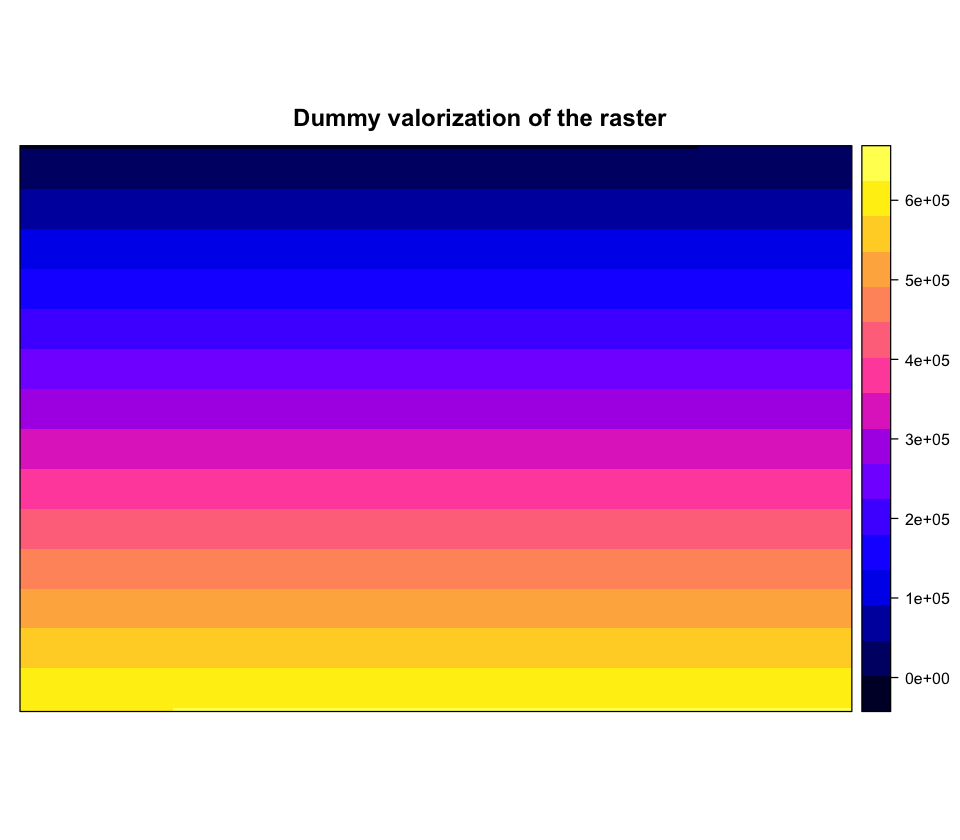

In [30]:
spplot(GRID, main = "Dummy valorization of the raster")

#### ––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––

## Step #1. <b style="color:orange">Coordinates Conversion</b>


#### ––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––

### Search in R help | <b style="color:blue">transform</b> and <b style="color:blue">project</b>

In [31]:
??transform  # search for string 'transform' in R Help

We get few options, which are more related to <b style="color:magenta">vector</b> data: <br>
 - spTransform(), package sp <br>
 - st_tranform(), package sf <br>

In [32]:
??project # search for string 'project' in R Help

We get above all one option, which is more related to <b style="color:magenta">raster</b> data: <br>
 - projectRaster(), package raster <br>

#### Use R

The suggestion is to build the required data model (i.e. vector or raster) and then proceed with the transform function in R.

##### vector data model

Build a simple feature object, and then use st_transform():

In [33]:
# The point below is taken from Google Maps, which has EPSG:4326
x <- 14.516343  # Longitude
y <- 41.224083  # Latitude
google_crs <- 4326

In [34]:
require(sf)
P_goo <- st_point(c(x, y))
P_goo

Loading required package: sf
Linking to GEOS 3.7.2, GDAL 2.4.2, PROJ 5.2.0
POINT (14.51634 41.22408)


In [35]:
P_goo_sfc <- st_sfc(P_goo, crs = google_crs)
class(P_goo_sfc)
P_goo_sfc

[1] "sfc_POINT" "sfc"

POINT (14.51634 41.22408)


Geometry set for 1 feature 
geometry type:  POINT
dimension:      XY
bbox:           xmin: 14.51634 ymin: 41.22408 xmax: 14.51634 ymax: 41.22408
epsg (SRID):    4326
proj4string:    +proj=longlat +datum=WGS84 +no_defs

In [36]:
my_crs <- 32633
P_my_sf <- st_transform(P_goo_sfc, my_crs)
P_my_sf

POINT (459461.7 4563746)


Geometry set for 1 feature 
geometry type:  POINT
dimension:      XY
bbox:           xmin: 459461.7 ymin: 4563746 xmax: 459461.7 ymax: 4563746
epsg (SRID):    32633
proj4string:    +proj=utm +zone=33 +datum=WGS84 +units=m +no_defs

In [37]:
P_goo_sf <- st_sf(point = 1, geometry = P_goo_sfc)
class(P_goo_sf)
P_goo_sf$geometry

[1] "sf"         "data.frame"

POINT (14.51634 41.22408)


Geometry set for 1 feature 
geometry type:  POINT
dimension:      XY
bbox:           xmin: 14.51634 ymin: 41.22408 xmax: 14.51634 ymax: 41.22408
epsg (SRID):    4326
proj4string:    +proj=longlat +datum=WGS84 +no_defs

In [38]:
my_crs <- 32633
P_my_sf <- st_transform(P_goo_sf, my_crs)
P_my_sf$geometry

POINT (459461.7 4563746)


Geometry set for 1 feature 
geometry type:  POINT
dimension:      XY
bbox:           xmin: 459461.7 ymin: 4563746 xmax: 459461.7 ymax: 4563746
epsg (SRID):    32633
proj4string:    +proj=utm +zone=33 +datum=WGS84 +units=m +no_defs

##### raster data model

Define the coordinates of the Upper-Left and Lower-Right points delimiting the bounding box of the RASTER we want to create:

In [39]:
#  Click on Google maps on the two points of the bbox and write the coordinates values here
UL <- c(11, 43)  # upper left
LR <- c(17, 38)  # lower right

In [40]:
require(raster)
GRID <- raster(xmn = UL[1], xmx = LR[1], ymn = LR[2], ymx = UL[2], resolution = 0.1, crs = crs("+init=epsg:4326"))
#       raster(xmn = UL[1], xmx = LR[1], ymn = LR[2], ymx = UL[2], resolution = 0.1, crs = 4326)

In [41]:
GRID

class      : RasterLayer 
dimensions : 50, 60, 3000  (nrow, ncol, ncell)
resolution : 0.1, 0.1  (x, y)
extent     : 11, 17, 38, 43  (xmin, xmax, ymin, ymax)
crs        : +init=epsg:4326 +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 


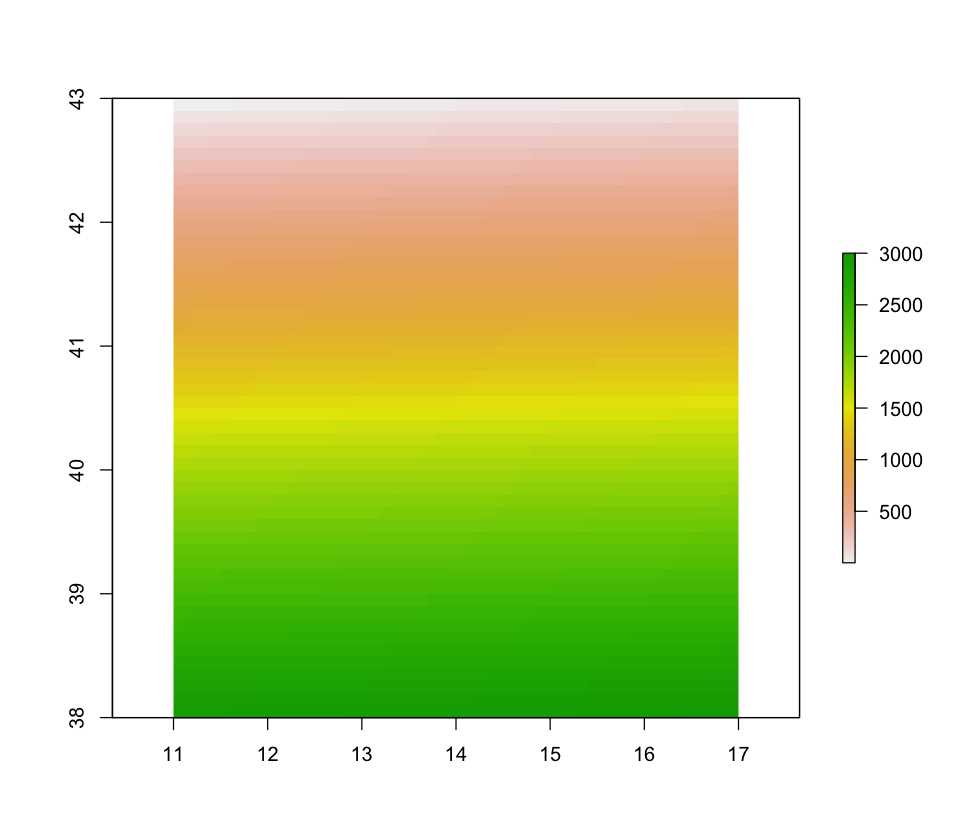

In [42]:
values(GRID) <- 1:ncell(GRID)
require(sp)
plot(GRID)

In [46]:
GRID_pr <- projectRaster(GRID, crs = "+init=EPSG:32633")

Plot: note that it is slightly rotated with respect to the previous one due to reprojection

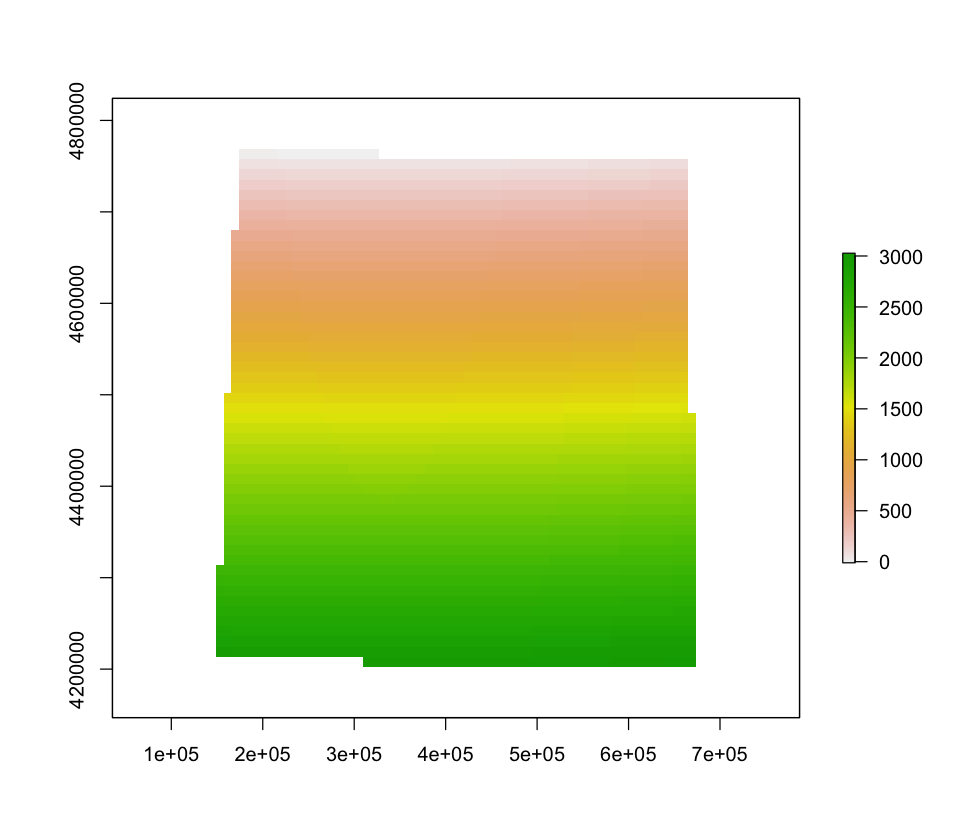

In [47]:
plot(GRID_pr)

#### Use epsg.io web application
https://epsg.io/transform

In [48]:
s_srs <- 4326
t_srs <- 32633
x <- 14.516343  # Longitude
y <- 41.224083  # Latitude
example_URL <- "https://epsg.io/transform#s_srs=4326&t_srs=32633&x=13.5000000&y=42.5000000"
my_URL <- paste0("https://epsg.io/transform#s_srs=", s_srs, "&t_srs=", t_srs, "&x=", x, "&y=", y)
my_URL

[1] "https://epsg.io/transform#s_srs=4326&t_srs=32633&x=14.516343&y=41.224083"

In [49]:
xc <- 459461.72
yc <- 4563745.65

Vienna, Austria<br>
P1(15.549644, 48.374276)<br>
P2(17.527792, 47.615370)

In [50]:
P1 <- st_point(c(15.549644, 48.374276))
P2 <- st_point(c(17.527792, 47.61537))

In [51]:
P <- st_sfc(P1, P2, crs = 4326)

In [52]:
P_3035 <- st_transform(P, crs = 3035)
P_3035

POINT (4731873 2822213)
POINT (4886176 2751202)


Geometry set for 2 features 
geometry type:  POINT
dimension:      XY
bbox:           xmin: 4731873 ymin: 2751202 xmax: 4886176 ymax: 2822213
epsg (SRID):    3035
proj4string:    +proj=laea +lat_0=52 +lon_0=10 +x_0=4321000 +y_0=3210000 +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs

### example using <b style="color:green">D.E.M.</b> raster

We can expect the air temperature to decrease by 6.5 degrees Celsius for every 1000 meters you gain in elevation.<br>
It means that for every meter we move up in elevation, the temperature decreases by 6.5/1000 °C:<br>
[ see Wikipedia at https://en.wikipedia.org/wiki/Atmospheric_temperature ]

In [53]:
6.5/1000

[1] 0.0065

The slope ($\beta$) of the relationship between temperature and elevation is 0.0065 Celsius degrees per each meter:<br>
$\beta = -0.0065 \frac{[°C]}{[m]}$


If we assume a temperature of 0 °C at elevation 0 meters,

In [ ]:
elev <- 0  # a.s.l. above see level
t0 <- 0  # *C
beta <- -0.0065

what is the predicted temperature at elevation given in the raster <b style="color:green">dem</b> at index position (1,1)?

In [54]:
dem[1, 1]

217.7

In [55]:
t <- 0 + 217.7 * -0.0065
print(t)

[1] -1.41505


which can be written also as

In [56]:
t <- t0 + dem[1, 1] * beta
print(t)

         
-1.41505 


##### Now, expand our model to make predictions of temperature using the information about elevation

We assume a linear regression model of the form:<br>
$y = \alpha + \beta x$

Now, assume a temperature of 12.5 °C at elevation 0 meters (the $\alpha$ parameter of the model) for today:<br>
$\alpha = 12.5 \;°C$

Calculate / Predict the value of temperature at positions in the DEM where matrix indices are:<br>
(1,1)<br>
(200,700)<br>
(3200,2200)

In [57]:
dem[1, 1]
12.5 - 0.0065 * dem[1, 1]

217.7

11.08495

In [58]:
dem[200, 700]
12.5 - 0.0065 * dem[200, 700]

784.2

7.4027

In [59]:
dem[3200, 2200]
12.5 - 0.0065 * dem[3200, 2200]

1182.4

4.8144

In [60]:
a <- 12.5  # alpha
b <- -0.0065  # beta
T <- a + b * dem
T

class      : RasterLayer 
dimensions : 3264, 4800, 15667200  (nrow, ncol, ncell)
resolution : 5, 5  (x, y)
extent     : 453000, 477000, 4556000, 4572320  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=33 +datum=WGS84 +units=m +no_defs +ellps=WGS84 +towgs84=0,0,0 
source     : /private/var/folders/dq/dpc2bdh55f965pnzkxft38300000gn/T/RtmpzRHvHo/raster/r_tmp_2020-11-30_171222_18907_37920.grd 
names      : dem5m_vt 
values     : 3.4858, 12.39665  (min, max)


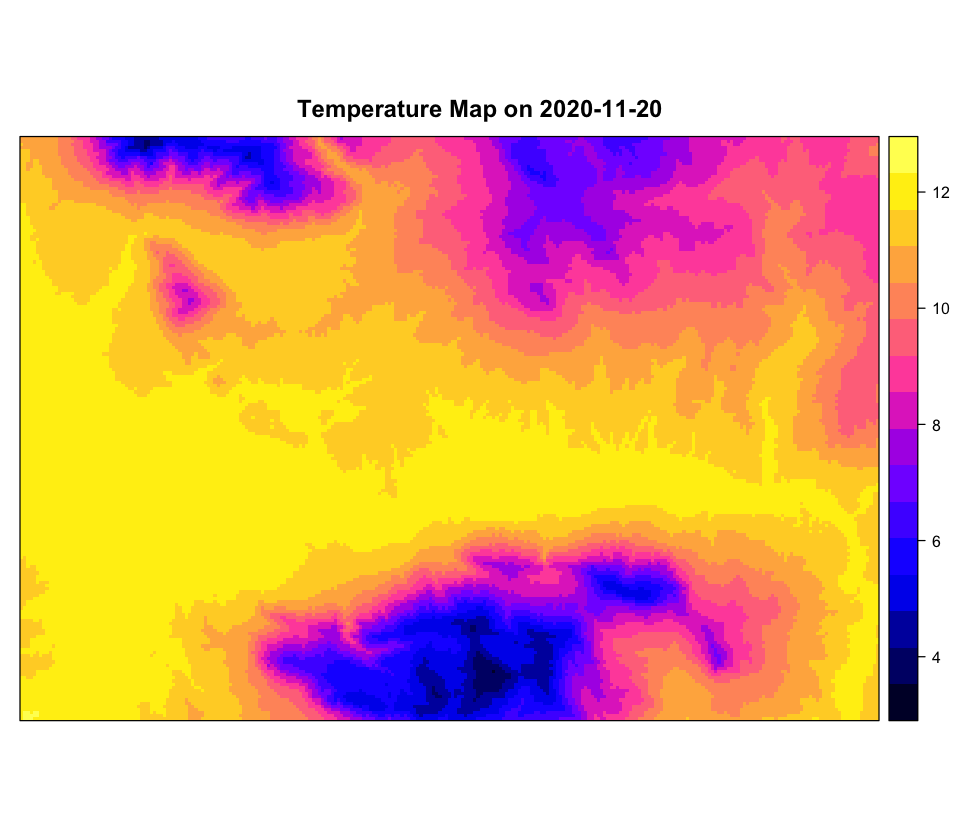

In [61]:
spplot(T, main = "Temperature Map on 2020-11-20")

##### Save raster | temperature map

In [63]:
writeRaster(x = T, filename = "Tair_VT_20201120.tif", overwrite = TRUE)

See which [ GDAL raster drivers  ](https://gdal.org/drivers/raster/index.html#raster-drivers) are available out there!